In [1]:
import os
import numpy as np
import matplotlib.path as path
import matplotlib.pyplot as plt
from matplotlib.collections import PolyCollection

In [106]:
def get_unique_repeats(aligned_repeats):
    unique_repeats = set()
    for rs in aligned_repeats:
        for r in rs:
            unique_repeats.add(r)

    return unique_repeats

def plot(aligned_repeats=None):
    aligned_repeats = ['BBB----', 'BBB----', 'BBB----', 'BBBAB--', 'BBCABBB', 'BBBAB--',
                       'BBBAB--', 'BBCABBB', 'BBBAB--', 'BBBAB--', 'BBCABBB', 'BBBAB--',
                       'BBB----', 'BBB----', 'BBBAB--', 'BBBAB--', 'BBCABBB', 'BBBAB--',
                       'BBBAB--', 'BBBAB--', 'BBBAA--', 'BBBAB--', 'BBBAB--', 'BBBAA--',
                       'BBBAA--', 'BBBAA--', 'BBBAAB-', 'BBBAA--', 'BBBAA--', 'BBBAAB-',
                       'BBB----', 'BBBBBB-', 'BBBABC-', 'BBBABAA', 'BBCABBB', 'BBBAB--',
                       'BBBAB--', 'BBBAB--', 'BBBAAC-', 'BBBABAA', 'BBBAB--', 'BBBAA--',
                       'BBB----', 'BBBBBB-', 'BBBABC-', 'BBBABAA', 'BBCABBB', 'BBBAB--',
                       'BBB----', 'BBBBBB-', 'BBBABC-', 'BBBABAA', 'BBCABBB', 'BBBAB--'
                       ]

    fig = plt.figure(figsize=(8, 5))  # width and height in inch

    max_repeat = len(aligned_repeats[0])
    print("max reepat", max_repeat)
    ax = plt.subplot(1, 1, 1, aspect=2, autoscale_on=False, frameon=False,
                     xticks=[x for x in range(len(aligned_repeats))],
                     yticks=[y for y in range(max_repeat)])

    unique_repeats = get_unique_repeats(aligned_repeats)
    cmap = plt.cm.get_cmap("tab10")
    # colors = cmap(len(unique_repeats))
    color_dict = {r: cmap(i) for i, r in enumerate(list(unique_repeats))}

    allele_count = len(aligned_repeats)
    box_height = max_repeat/len(aligned_repeats[0])
    box_width = 1.0
    print("box height", box_height)
    print("box width", box_width)

    for allele_index, allele in enumerate(aligned_repeats):
        print("allele index", allele_index)
        box_position = [allele_index, 0]
        print("box position", box_position)
        for box_index, repeat in enumerate(allele):
            box_position[1] = box_height * box_index
            fcolor = color_dict[repeat]
            if repeat == '-':
                fcolor = (1, 1, 1, 1)
            ax.add_patch(plt.Rectangle(box_position, box_width, box_height,
                                       linewidth=1,
                                       facecolor=fcolor,
                                       edgecolor="white"))

    # ax.set_xlim(0, 1)
    # ax.set_ylim(0, 1)
    plt.xticks([])
    plt.tight_layout()
    plt.savefig("test_multiple_plot.png")
    plt.show()

max reepat 7
box height 1.0
box width 1.0
allele index 0
box position [0, 0]
allele index 1
box position [1, 0]
allele index 2
box position [2, 0]
allele index 3
box position [3, 0]
allele index 4
box position [4, 0]
allele index 5
box position [5, 0]
allele index 6
box position [6, 0]
allele index 7
box position [7, 0]
allele index 8
box position [8, 0]
allele index 9
box position [9, 0]
allele index 10
box position [10, 0]
allele index 11
box position [11, 0]
allele index 12
box position [12, 0]
allele index 13
box position [13, 0]
allele index 14
box position [14, 0]
allele index 15
box position [15, 0]
allele index 16
box position [16, 0]
allele index 17
box position [17, 0]
allele index 18
box position [18, 0]
allele index 19
box position [19, 0]
allele index 20
box position [20, 0]
allele index 21
box position [21, 0]
allele index 22
box position [22, 0]
allele index 23
box position [23, 0]
allele index 24
box position [24, 0]
allele index 25
box position [25, 0]
allele index 26


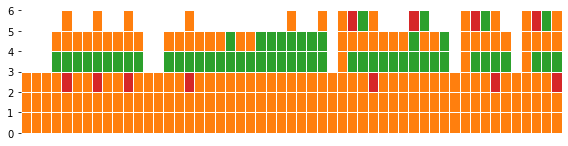

In [107]:
plot()

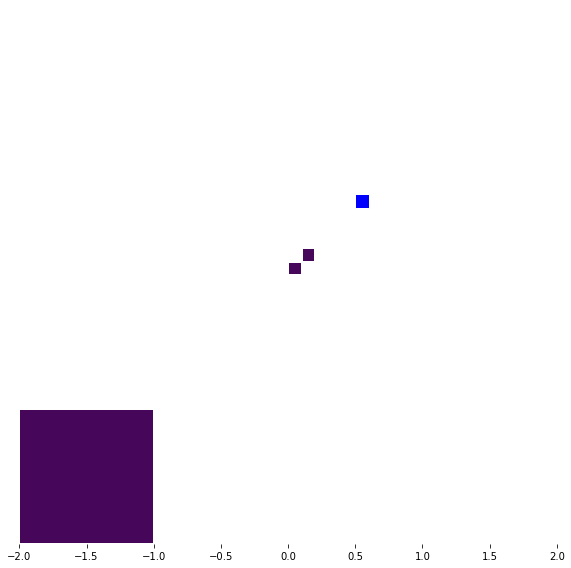

In [38]:
fig = plt.figure(figsize=(8, 8))
# fig = plt.figure()
ax = plt.subplot(1, 1, 1, aspect=1,autoscalex_on=True, frameon=False, yticks=[])

number_of_distinct_repeats = 4
cmap = plt.cm.get_cmap("viridis")
colors = cmap(number_of_distinct_repeats)

# Squares
collection = PolyCollection(
    [ [[0, 0], [.1, 0], [.1, .1], [0, .1]],
      [[.1, .1], [.2, .1], [.2, .2], [.1, .2]],
      [[11, 11], [12, 11], [12, 12], [11, 12]],
      [[-1, -1], [-2, -1], [-2, -2], [-1, -2]]
      ], closed=True, linewidth=2, facecolors=colors, edgecolors="white"
)
ax.add_collection(collection)

ax.add_patch(plt.Rectangle((0.5,0.5), .1, .1, linewidth=1, facecolor="blue", edgecolor="white"))
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
plt.tight_layout()
plt.savefig("test_plot.png")
plt.show()

In [5]:

import os
import numpy as np
import matplotlib.path as path
import matplotlib.pyplot as plt
from matplotlib.collections import PolyCollection

# Maze parameters
n_arms = 8
n_squares = 5
square_width = 1.5
square_height = 1.5
inner_radius = 3
outer_radius = inner_radius + n_squares * square_height
delta = 0.1  # cosmetic to widen a bit maze arms

W, C = [], []
for i in range(n_arms):
    theta = i / n_arms * 2 * np.pi

    # Build external walls
    N = (square_width / 2 + delta) * np.array([np.sin(theta), -np.cos(theta)])
    V_in = inner_radius * np.array([np.cos(theta), np.sin(theta)])
    V_out = (outer_radius + delta) * np.array([np.cos(theta), np.sin(theta)])
    W.extend([V_in + N, V_out + N, V_out - N, V_in - N])

    # Build arm start (pie)
    t0 = theta - 0.5 / n_arms * 2 * np.pi
    t1 = theta + 0.5 / n_arms * 2 * np.pi
    V = []
    for t in np.linspace(t0, t1, 25):
        V.append(1.00 * inner_radius * np.array([np.cos(t), np.sin(t)]))
    for t in np.linspace(t1, t0, 25):
        V.append(0.25 * inner_radius * np.array([np.cos(t), np.sin(t)]))
    V.append(V[-1])
    C.append(V)

    # Build arms squares
    N = square_width / 2 * np.array([np.sin(theta), -np.cos(theta)])
    T = square_height / 2 * np.array([np.cos(theta), np.sin(theta)])
    for j in range(n_squares):
        r = inner_radius + (j + 0.5) / n_squares * (outer_radius - inner_radius)
        V = r * np.array([np.cos(theta), np.sin(theta)])
        C.append([V - T + N, V + T + N, V + T - N, V - T - N])

W.append(W[0])
W = np.array(W)


class PathTracer:
    """ Path tracer on a figure
    You can trace a path using your mouse:
      1. Click to start
      2. Move th mouse
      3. Click to stop and save (if save=True)
    """

    def __init__(self, line=None, load=True, save=True, filename="path.npy"):
        self.line = line
        self.save = save
        self.filename = filename
        self.xs = []
        self.ys = []
        self.active = False
        if load and os.path.exists(self.filename):
            P = np.load(self.filename)
            self.xs = P[:, 0].tolist()
            self.ys = P[:, 1].tolist()
            self.line.set_data(self.xs, self.ys)
            self.line.figure.canvas.draw()
        line.figure.canvas.mpl_connect("button_press_event", self.on_press)
        line.figure.canvas.mpl_connect("motion_notify_event", self.on_motion)

    def on_press(self, event):
        if event.inaxes != self.line.axes:
            return
        if not self.active:
            self.active = True
            self.xs = [event.xdata]
            self.ys = [event.ydata]
        else:
            self.active = False
            if self.save:
                P = np.c_[self.xs, self.ys]
                np.save(self.filename, P)
        self.line.set_data(self.xs, self.ys)
        self.line.figure.canvas.draw()

    def on_motion(self, event):
        if event.inaxes != self.line.axes or not self.active:
            return
        x, y = event.xdata, event.ydata
        d = np.sqrt((x - self.xs[-1]) ** 2 + (y - self.ys[-1]) ** 2)
        if d < 0.1:
            return
        self.xs.append(event.xdata)
        self.ys.append(event.ydata)
        self.line.set_data(self.xs, self.ys)
        self.line.figure.canvas.draw()


# The maze-path as been drawn by hand using the path tracer above
# Here we count the number of path points contained in each part
# of the same such as to set the color usng a colormap
P = np.load("radial-maze-path.npy")
N = np.zeros(len(C))
for i, vertices in enumerate(C):
    codes = [path.Path.MOVETO] + [path.Path.LINETO,] * (len(vertices) - 1)
    p = path.Path(vertices, codes)
    N[i] = p.contains_points(P).sum()
N = 1 - (N - N.min()) / (N.max() - N.min())
cmap = plt.cm.get_cmap("viridis")
colors = cmap(N)

# Alternatively, you can also set colors on each arm
# colors = [] # this will be a list of n_arms * n_squares colors
# for arm in range(n_arms):
#     for square in range(n_squares+1):
#         if arm < 6:
#             color = cmap(square/n_squares)
#         else:
#             color = 0.00, 0.0, 0.00, 0.05
#         colors.append(color)

# -------------------------------------------------------
fig = plt.figure(figsize=(8, 8))
ax = plt.subplot(1, 1, 1, aspect=1, frameon=False, xticks=[], yticks=[])

# Borders
plt.plot(W[:, 0], W[:, 1], color="black", linewidth=2, zorder=10)

# Squares
collection = PolyCollection(
    C, closed=True, linewidth=2, facecolors=colors, edgecolors="white"
)
ax.add_collection(collection)

# Letters
for i in range(n_arms):
    theta = i / n_arms * 2 * np.pi
    x = (outer_radius + 1) * np.cos(theta)
    y = (outer_radius + 1) * np.sin(theta)
    ax.text(
        x,
        y,
        chr(ord("A") + i),
        weight="bold",
        rotation=i / n_arms * 360 - 90,
        va="center",
        ha="center",
        size="xx-large",
    )

# Path tracker click to start and end (clear previous path)
(line,) = ax.plot([], [], linestyle="-", color="black", linewidth=1.0, alpha=0.75)
tracer = PathTracer(line, save=False, filename="radial-maze-path.npy")

plt.tight_layout()
plt.savefig("../../figures/beyond/radial-maze.pdf")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'radial-maze-path.npy'